# Medical Cost Prediction

### Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [47]:
file = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')

In [48]:
df= pd.DataFrame(file)

In [49]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [50]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

##### Charges is Dependant (Y) variable

### Handelling Null Values 

In [19]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Label Encoding

In [20]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [21]:
from sklearn.preprocessing import LabelEncoder

In [55]:
LE= LabelEncoder()

In [56]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [57]:
df['sex']=LE.fit_transform(df['sex'])

In [58]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [59]:
df['region']=LE.fit_transform(df['region'])

In [60]:
df['smoker'].unique()

array([1, 0])

In [61]:
df['smoker']=LE.fit_transform(df['smoker'])

#### obs -: Encoding Applies with ascending order of alphabets

In [62]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


### Data Visualization

In [30]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<AxesSubplot:xlabel='age', ylabel='charges'>

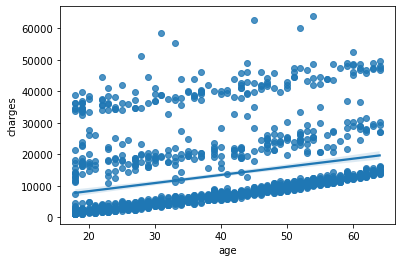

In [37]:
sns.regplot(df['age'],df['charges'])

In [42]:
# as age increases charges also positively increases

<AxesSubplot:xlabel='age', ylabel='charges'>

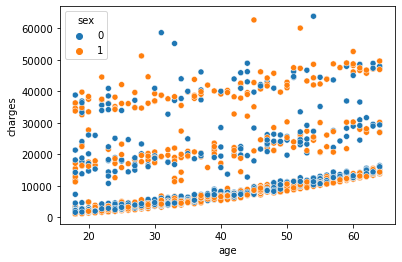

In [44]:
sns.scatterplot(df['age'],df['charges'],hue=df['sex'])

<AxesSubplot:xlabel='bmi', ylabel='charges'>

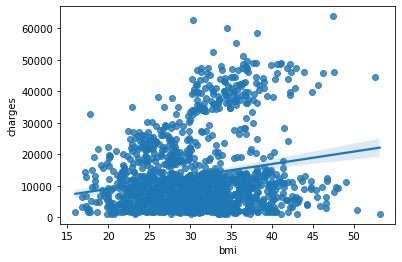

In [40]:
sns.regplot(df['bmi'],df['charges'])

In [41]:
# as bmi increases charges increases

<AxesSubplot:xlabel='sex', ylabel='count'>

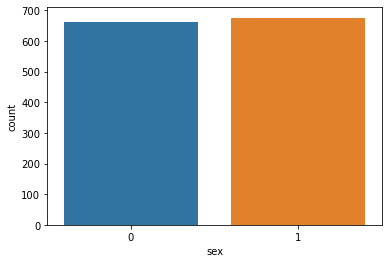

In [45]:
sns.countplot(df['sex'])

In [46]:
df['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [63]:
# males are slightly more than females

<AxesSubplot:xlabel='smoker', ylabel='count'>

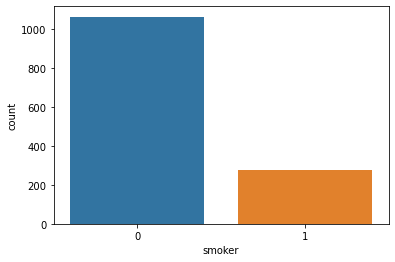

In [65]:
sns.countplot(df['smoker'])

In [64]:
df['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [66]:
#huge diffeerence betn smokers and non smokers (non-smokers>smokers)

<AxesSubplot:xlabel='children', ylabel='age'>

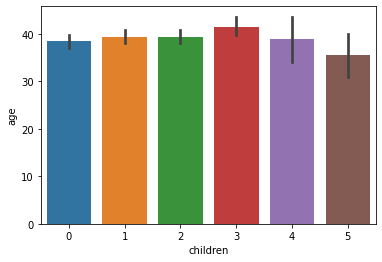

In [70]:
sns.barplot(df['children'],df['age'])

In [75]:
# there is no fixed relation between age and present children

<AxesSubplot:xlabel='smoker', ylabel='age'>

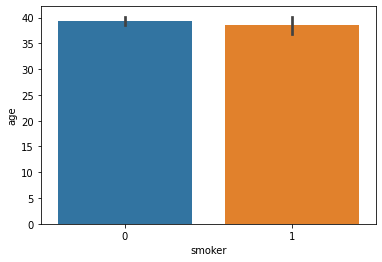

In [71]:
sns.barplot(df['smoker'],df['age'])

<AxesSubplot:xlabel='region', ylabel='children'>

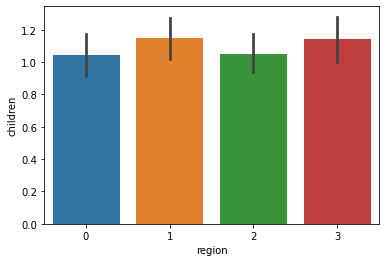

In [73]:
sns.barplot(df['region'],df['children'])

In [74]:
# north west's people have more no. of childrens than others

<AxesSubplot:xlabel='age', ylabel='charges'>

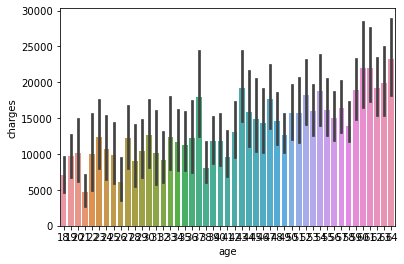

In [78]:
sns.barplot(df['age'],df['charges'])

In [79]:
# as age increases charges increases

<AxesSubplot:xlabel='bmi', ylabel='Density'>

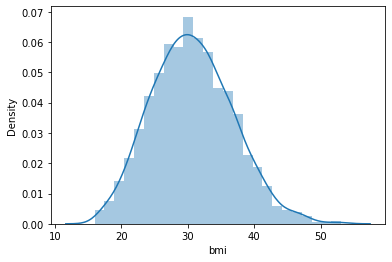

In [80]:
sns.distplot(df['bmi'])

<AxesSubplot:xlabel='charges', ylabel='Density'>

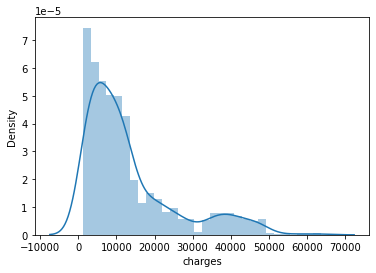

In [81]:
sns.distplot(df['charges'])

In [82]:
# majority of charges are taken within 0-20000

<AxesSubplot:xlabel='bmi'>

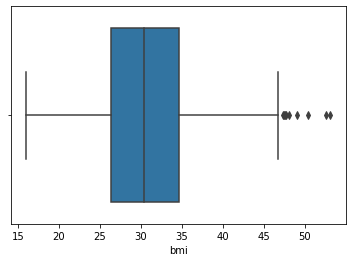

In [83]:
sns.boxplot(df['bmi'])

<AxesSubplot:xlabel='age'>

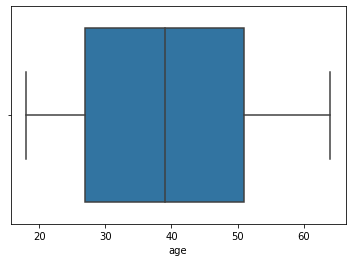

In [88]:
sns.boxplot(df['age'])

In [85]:
# outliers are detected in bmi

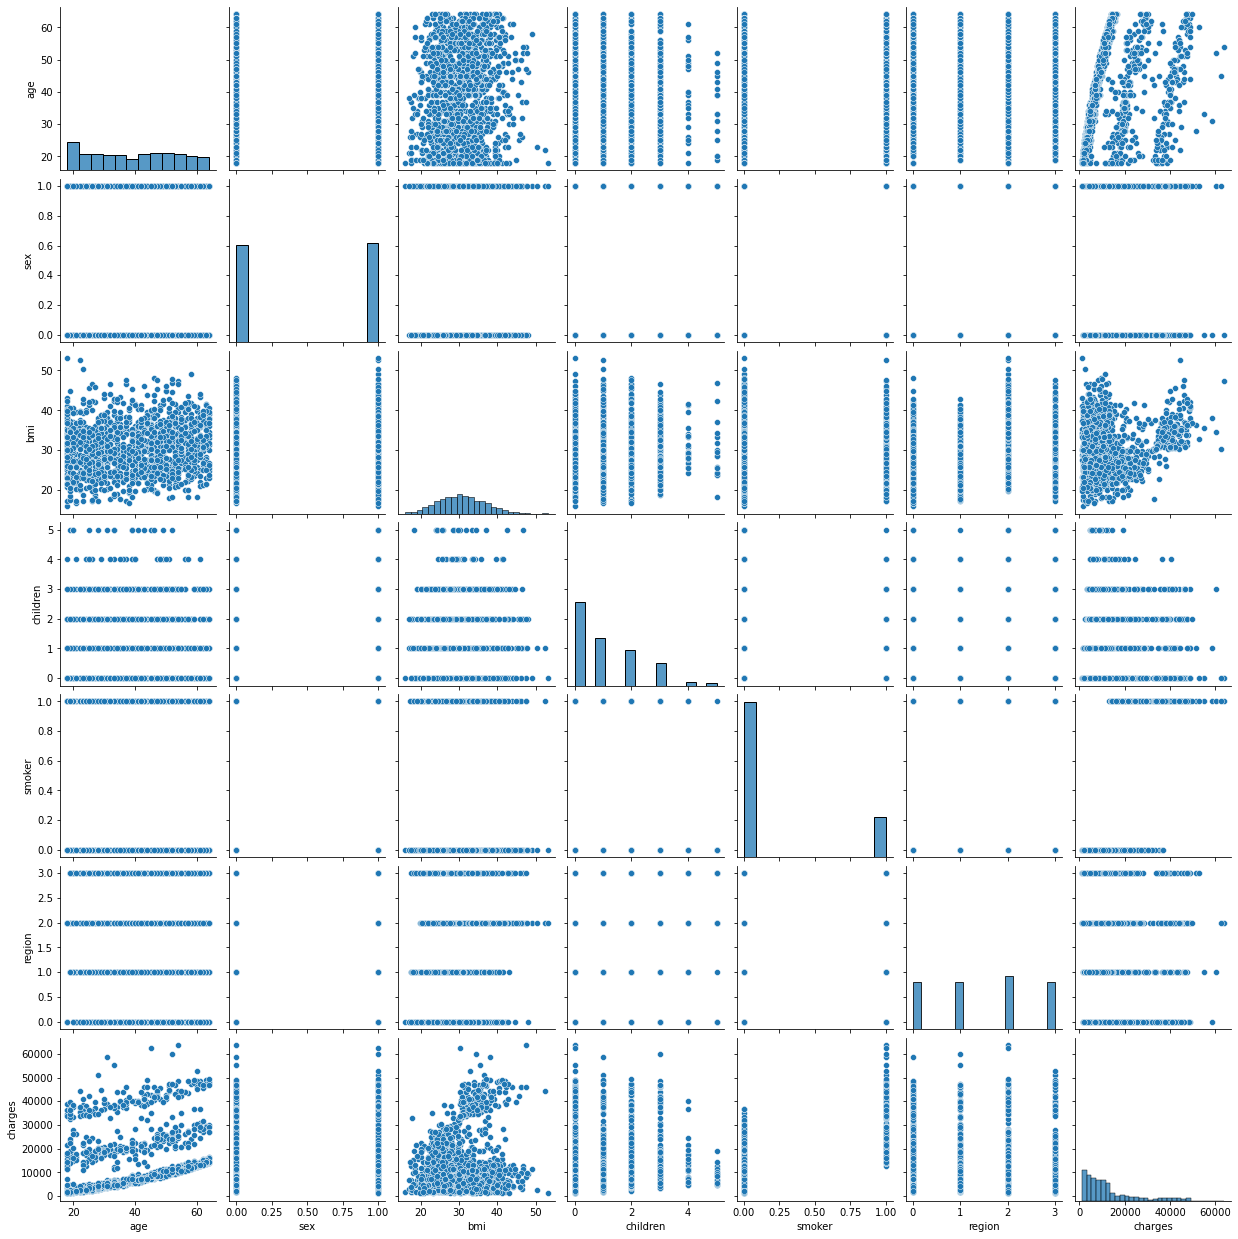

In [86]:
sns.pairplot(df)

## Summary Stats

In [87]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


## EDA Process

#### Removing skewness

In [91]:
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

In [95]:
# no huge skewness is seen in variables like bmi

### Feature Engineering

#### Removing Outliers

In [96]:
from scipy.stats import zscore

In [97]:
z= np.abs(zscore(df))

In [98]:
df1=df[(z<3).all(axis=1)]

In [99]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


### Correlational Test

<AxesSubplot:>

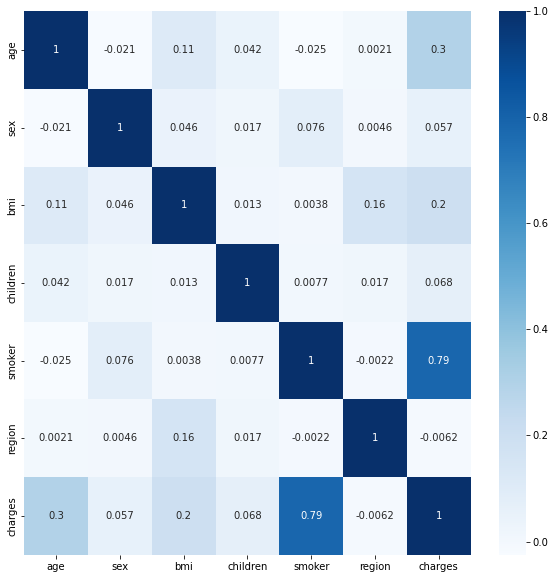

In [104]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [105]:
df1.drop('region',axis=1,inplace=True)

In [106]:
df1

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


#### VIF

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [108]:
x=df.iloc[:,:-1]

In [109]:
y=df.iloc[:,-1]

In [110]:
y.shape

(1338,)

In [111]:
def vif_cal():
    vif=pd.DataFrame()
    vif['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['columns']=x.columns
    print(vif)

In [112]:
vif_cal()

         vif   columns
0   7.551348       age
1   2.001061       sex
2  10.371829       bmi
3   1.801245  children
4   1.256837    smoker
5   2.924528    region


#### Making Normal Distribution

In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
SS= StandardScaler()

In [115]:
x = SS.fit_transform(x)

#### Train Test Split

In [117]:
from sklearn.model_selection import train_test_split

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=43)

In [123]:
x_train.shape

(936, 6)

In [124]:
y_train.shape

(936,)

In [121]:
y_test.shape

(402,)

In [122]:
x_test.shape

(402, 6)

#### Using Algorithms

In [125]:
from sklearn.linear_model import LinearRegression

In [126]:
lr=LinearRegression()

In [127]:
lr.fit(x_train,y_train)

LinearRegression()

In [128]:
lr.score(x_train,y_train)

0.747799091081303

In [129]:
lr.intercept_

13041.602362498736

In [130]:
# coef means if x increase by 1 then how many y will increase
lr.coef_

array([3331.45942087,  -19.47581057, 1944.22934931,  637.79160789,
       9467.58040953, -504.68196032])

In [133]:
col=df1.columns

In [134]:
list(zip(lr.coef_,col))

[(3331.459420865204, 'age'),
 (-19.47581056590648, 'sex'),
 (1944.2293493083414, 'bmi'),
 (637.7916078876332, 'children'),
 (9467.58040952746, 'smoker'),
 (-504.6819603210796, 'charges')]

In [135]:
pred= lr.predict(x_test)

In [136]:
pred

array([ 8367.05929067,  6483.24182501,  3214.84016447, 14515.28575532,
       27919.12941132, 10279.94330324, 10830.60625476,  7366.68223883,
        9690.57497849,  1853.09801195, 26979.30395608, 24988.7509003 ,
        9271.84112941,  9634.36994252,  2903.19263151,  5538.00669152,
        3124.98983185, 26596.18487519,  7117.79854915,  4038.91018647,
        5355.45335357, 11895.63088292,  2818.49466671, 11100.78300627,
        6935.72191915,  7528.9901088 , 10857.30966944, 39443.85840772,
        2712.55716578, 12182.20074921, 14416.21076666, 31557.47053204,
       15206.86426936,  1739.98402163, 11833.42204104,  4253.82585621,
        7756.03950818, 12411.01673485, 10297.35839273,  5615.13849861,
       27676.06449535, 27799.59839235,  3957.34540565, 13684.59707244,
       11219.50458144, 33582.22536378, 11672.09096459,  3451.54395487,
       26816.8251407 ,  7298.63492411,  1446.25480472,  6504.08249691,
        9016.39235262, 31827.63153491,  2524.02914181,  2082.93843869,
      

In [137]:
predicted_df=pd.DataFrame(pred)

In [138]:
predicted_df.head()

,0
0,8367.059291
1,6483.241825
2,3214.840164
3,14515.285755
4,27919.129411


In [139]:
lr.score(x_test,y_test)

0.7497518500786089

#### Calculating Error

In [140]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [143]:
print('mean squared error=',mean_squared_error(y_test,pred))
print('root mean squared error=',np.sqrt(mean_squared_error(y_test,pred)))
print('mean abs error=',mean_absolute_error(y_test,pred))
print('r2 score/performence score=',r2_score(y_test,pred))

mean squared error= 41183311.21316553
root mean squared error= 6417.422474262196
mean abs error= 4448.753507988243
r2 score/performence score= 0.7497518500786089


#### Regularization

In [160]:
# to improve accuracy of model

In [161]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [171]:
lasso= Lasso(alpha=0.1)

In [172]:
lasso.fit(x_train,y_train)

Lasso(alpha=0.1)

In [173]:
lasso.score(x_train,y_train)

0.7477990906256986

In [174]:
lasso_pred=lasso.predict(x_test)

In [175]:
r2_score(y_test,lasso_pred)

0.7497503959268397

In [180]:
ridge=Ridge(alpha=0.001)

In [181]:
ridge.fit(x_train,y_train)

Ridge(alpha=0.001)

In [182]:
ridge.score(x_train,y_train)

0.7477990910804138

In [197]:
ridge_pred=ridge.predict(x_test)

In [198]:
r2_score(y_test,ridge_pred)

0.7497517454961866

In [200]:
EN = ElasticNet(alpha=0.001)

In [201]:
EN.fit(x_train,y_train)

ElasticNet(alpha=0.001)

In [204]:
enpred=EN.predict(x_test)

In [205]:
r2_score(y_test,enpred)

0.7497027481867973

#### Using More algos

In [185]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [186]:
knn= KNeighborsRegressor()
dtc= DecisionTreeRegressor()
svr = SVR()

In [187]:
models = [knn,dtc,svr]

In [188]:
for i in models:
    i.fit(x_train,y_train)
    regressor_pred=i.predict(x_test)
    print('score of',i,i.score(x_train,y_train))
    print('mean squared error of',i,mean_squared_error(y_test,regressor_pred))
    print('root mean squared error of',i,np.sqrt(mean_squared_error(y_test,regressor_pred)))
    print('mean abs errorof',i,mean_absolute_error(y_test,regressor_pred))
    print('r2 score/performence of',i,r2_score(y_test,regressor_pred))
    print('\n')

score of KNeighborsRegressor() 0.8740002244269716
mean squared error of KNeighborsRegressor() 34014079.99833165
root mean squared error of KNeighborsRegressor() 5832.159119771309
mean abs errorof KNeighborsRegressor() 3503.24555050995
r2 score/performence of KNeighborsRegressor() 0.7933152934983145


score of DecisionTreeRegressor() 0.9985810992373253
mean squared error of DecisionTreeRegressor() 41726534.01879712
root mean squared error of DecisionTreeRegressor() 6459.607884291207
mean abs errorof DecisionTreeRegressor() 3117.1051929452738
r2 score/performence of DecisionTreeRegressor() 0.7464509862553776


score of SVR() -0.10754390827448024
mean squared error of SVR() 195550667.6950058
root mean squared error of SVR() 13983.94320980337
mean abs errorof SVR() 9081.434388950694
r2 score/performence of SVR() -0.18825299289980268




#### Ensemble methods 

In [189]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,VotingRegressor

In [190]:
RF=RandomForestRegressor(random_state=42)
GB=GradientBoostingRegressor()
ADA=AdaBoostRegressor()

In [195]:
ensemble_algo=[RF,GB,ADA]

for i in ensemble_algo:
    i.fit(x_train,y_train)
    ensemble_algo_pred=i.predict(x_test)
    print('score of',i,i.score(x_train,y_train))
    print('mean squared error of',i,mean_squared_error(y_test,regressor_pred))
    print('root mean squared error of',i,np.sqrt(mean_squared_error(y_test,regressor_pred)))
    print('mean abs errorof',i,mean_absolute_error(y_test,regressor_pred))
    print('r2 score/performence of',i,r2_score(y_test,regressor_pred))
    print('\n')

score of RandomForestRegressor(random_state=42) 0.9784596385842156
mean squared error of RandomForestRegressor(random_state=42) 195550667.6950058
root mean squared error of RandomForestRegressor(random_state=42) 13983.94320980337
mean abs errorof RandomForestRegressor(random_state=42) 9081.434388950694
r2 score/performence of RandomForestRegressor(random_state=42) -0.18825299289980268


score of GradientBoostingRegressor() 0.9164999311365091
mean squared error of GradientBoostingRegressor() 195550667.6950058
root mean squared error of GradientBoostingRegressor() 13983.94320980337
mean abs errorof GradientBoostingRegressor() 9081.434388950694
r2 score/performence of GradientBoostingRegressor() -0.18825299289980268


score of AdaBoostRegressor() 0.8388302863032502
mean squared error of AdaBoostRegressor() 195550667.6950058
root mean squared error of AdaBoostRegressor() 13983.94320980337
mean abs errorof AdaBoostRegressor() 9081.434388950694
r2 score/performence of AdaBoostRegressor() -0.

### Exporting Decision Tree Model

#### KNN have better aaccuracy of 79 %

In [207]:
import joblib

In [208]:
knn_obj= joblib.dump(knn,'DT-1(CostPred).obj')